In [1]:
# import pandas
import pandas as pd

# panggil dataset kopi
df = pd.read_csv("dataset_kualitas_kopi.csv")

# tampilkan dataset kopi yang sudah diubah menjadi dataframe
df

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk
...,...,...,...,...
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk


In [5]:
# menampilkan jumlah baris dan kolom
df.shape

(300, 4)

In [6]:
# menampilkan daftar kolom
df.columns

Index(['Kadar Kafein', 'Tingkat Keasaman', 'Jenis Proses', 'Kualitas Kopi'], dtype='object')

In [7]:
# menampilkan kolom dan tipe datanya
df.dtypes

Kadar Kafein        float64
Tingkat Keasaman    float64
Jenis Proses         object
Kualitas Kopi        object
dtype: object

In [8]:
# tampilkan struktur dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Kadar Kafein      300 non-null    float64
 1   Tingkat Keasaman  300 non-null    float64
 2   Jenis Proses      300 non-null    object 
 3   Kualitas Kopi     300 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [9]:
# tampilkan informasi statistik
df.describe()

,Kadar Kafein,Tingkat Keasaman
count,300.000000,300.000000
mean,94.880478,5.255010
std,18.612343,0.423348
min,60.340609,4.505419
25%,80.885090,4.912739
50%,96.469407,5.249464
75%,108.570401,5.622462
max,129.569514,5.995027


In [10]:
# tampilkan 5 data teratas
df.head()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
0,71.676050,4.505419,Honey,Buruk
1,89.899105,4.777716,Honey,Buruk
2,101.782740,5.987926,Washed,Sedang
3,112.958351,5.145615,Natural,Baik
4,68.571363,4.934300,Honey,Buruk


In [11]:
# tampilkan 5 data terbawah
df.tail()

,Kadar Kafein,Tingkat Keasaman,Jenis Proses,Kualitas Kopi
295,105.346259,5.511636,Washed,Sedang
296,114.917455,5.150439,Natural,Baik
297,99.558838,5.612135,Washed,Sedang
298,88.621531,4.803087,Honey,Buruk
299,98.192872,5.504599,Washed,Sedang


In [13]:
# menampilkan kategori jenis proses beserta jumlahnya
df["Jenis Proses"].value_counts()

Jenis Proses
Natural    103
Honey      101
Washed      96
Name: count, dtype: int64

In [14]:
# tampilkan kategori kualitas kopi beserta jumlahnya
df["Kualitas Kopi"].value_counts()

Kualitas Kopi
Baik      103
Buruk      99
Sedang     98
Name: count, dtype: int64

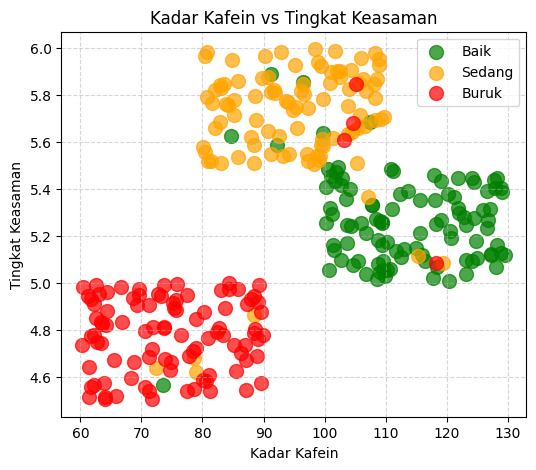

In [32]:
# import matplotlib
import matplotlib.pyplot as plt

# siapkan data
baik = df[df["Kualitas Kopi"]=="Baik"]
sedang = df[df["Kualitas Kopi"]=="Sedang"]
buruk = df[df["Kualitas Kopi"]=="Buruk"]

# buat figura
plt.figure(figsize=(6,5))

# tampilkan scatter plot
plt.scatter(baik["Kadar Kafein"], baik["Tingkat Keasaman"],
            s=100, color="green", alpha=0.7, label="Baik")
plt.scatter(sedang["Kadar Kafein"], sedang["Tingkat Keasaman"],
            s=100, color="orange", alpha=0.7, label="Sedang")
plt.scatter(buruk["Kadar Kafein"], buruk["Tingkat Keasaman"],
            s=100, color="red", alpha=0.7, label="Buruk")
plt.xlabel("Kadar Kafein")
plt.ylabel("Tingkat Keasaman")
plt.title("Kadar Kafein vs Tingkat Keasaman")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"]]
y = df["Kualitas Kopi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["Kadar Kafein", "Tingkat Keasaman"]
categorical_columns = ["Jenis Proses"]


preprocessing = ColumnTransformer(
    transformers=[
        ("scaler",StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
    ]
)

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LogisticRegression()),
    ]
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))

print("\nClassification Report :\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.9666666666666667

Classification Report :
               precision    recall  f1-score   support

        Baik       1.00      0.94      0.97        18
       Buruk       0.96      1.00      0.98        26
      Sedang       0.94      0.94      0.94        16

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60


Confusion Matrix :
 [[17  0  1]
 [ 0 26  0]
 [ 0  1 15]]


In [51]:
data_baru = pd.DataFrame([[110, 5, "Honey"]], 
    columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])

prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])

print(f"Prediksi {prediksi} dengan keyakinan {presentase*100:.2f}%")

Prediksi Baik dengan keyakinan 66.49%


In [52]:
data_baru = pd.DataFrame([[110, 5, "Natural"]], 
    columns=["Kadar Kafein", "Tingkat Keasaman", "Jenis Proses"])

prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])

print(f"Prediksi {prediksi} dengan keyakinan {presentase*100:.2f}%")

Prediksi Baik dengan keyakinan 91.67%


In [53]:
import joblib

joblib.dump(model, "model_klasifikasi_kopi.joblib")

['model_klasifikasi_kopi.joblib']